In [13]:


import pandas as pd
import numpy as np
import random as rnd
import pprint
from itertools import cycle, islice
import numpy as np

from scipy.stats import multivariate_normal

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from inspect import signature

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')
import os
#print(os.listdir("../input"))

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
pip3 install -U pip virtualenv

SyntaxError: invalid syntax (<ipython-input-4-20b7ca8c7f61>, line 1)

In [0]:
# Load MIMIC2 data 

data = pd.read_csv('mimic3c.csv')
print("With id", data.shape)

data_full = data.drop('hadm_id', 1)
print("No id",data_full.shape)

With id (58976, 28)
No id (58976, 27)


In [0]:
print(data_full.shape)
data_full.info()
data_full.describe()

(58976, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 27 columns):
gender              58976 non-null object
age                 58976 non-null int64
LOSdays             58976 non-null float64
admit_type          58976 non-null object
admit_location      58976 non-null object
AdmitDiagnosis      58951 non-null object
insurance           58976 non-null object
religion            58518 non-null object
marital_status      48848 non-null object
ethnicity           58976 non-null object
NumCallouts         58976 non-null float64
NumDiagnosis        58976 non-null float64
NumProcs            58976 non-null float64
AdmitProcedure      58976 non-null object
NumCPTevents        58976 non-null float64
NumInput            58976 non-null float64
NumLabs             58976 non-null float64
NumMicroLabs        58976 non-null float64
NumNotes            58976 non-null float64
NumOutput           58976 non-null float64
NumRx               58976 non-

,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,2.360248
std,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,1.000000
50%,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,2.000000
75%,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,3.000000
max,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,4.000000


In [0]:
data_full.head(10)

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,0.16,2.59,0.00,na,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
1,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,0.25,2.23,0.99,Endosc control gast hem,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,2
2,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,0.00,0.75,0.17,Non-invasive mech vent,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,4
3,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,0.41,0.69,0.27,Part sm bowel resect NEC,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,2
4,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,0.00,3.69,0.82,Aortocor bypas-3 cor art,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,2
5,F,54,4.38,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,Private,EPISCOPALIAN,MARRIED,WHITE,0.23,1.14,0.68,Nephroureterectomy,1.83,6.62,30.59,0.00,0.11,7.99,9.13,1.14,0.91,448.63,0,509.00,2
6,M,21,14.38,EMERGENCY,CLINIC REFERRAL/PREMATURE,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,Medicaid,NOT SPECIFIED,SINGLE,HISPANIC OR LATINO,0.07,0.97,1.04,Debrid opn fx-femur,3.13,62.38,43.46,1.88,0.21,18.01,9.94,4.10,0.21,1337.13,0,1482.53,4
7,M,67,10.08,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,WHITE,0.10,1.09,0.40,1 int mam-cor art bypass,1.09,19.54,38.49,0.30,0.15,15.48,14.48,2.28,0.60,524.11,0,618.11,3
8,F,49,0.63,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RIGHT SHOULDER ADHESIVE CAPSULITIS/SDA,Medicaid,CATHOLIC,SINGLE,WHITE,0.00,12.70,4.76,Rep recur shlder disloc,3.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.76,0.00,0,25.39,1
9,M,55,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,PNEUMONIA,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,0.00,1.78,0.81,Temporary tracheostomy,2.43,25.93,34.36,0.81,0.21,16.53,10.05,1.13,0.49,1221.39,0,1315.92,2


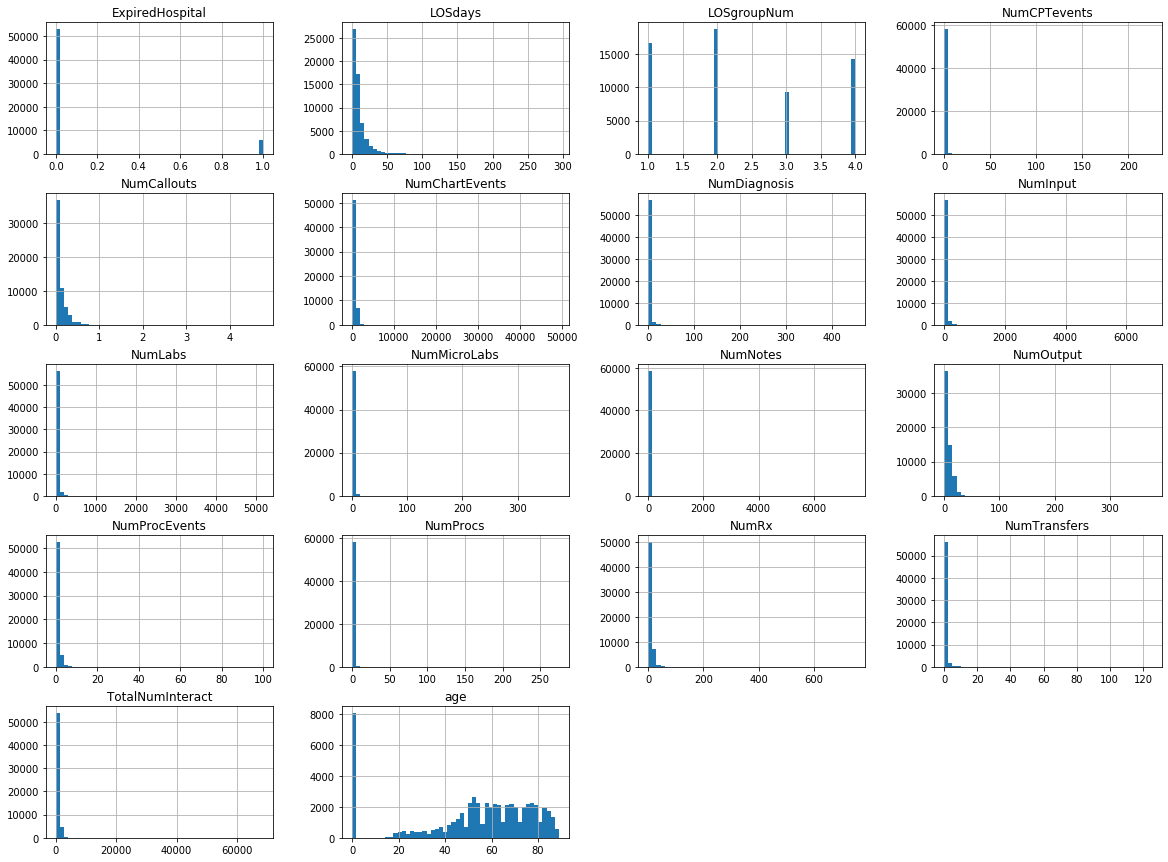

In [0]:
data_full.hist(bins=50, figsize=(20,15))
plt.show()

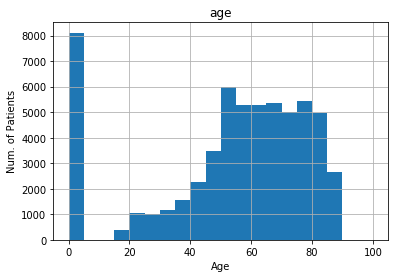

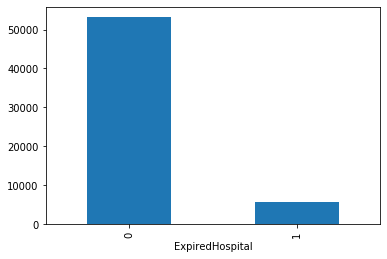

In [0]:
age_histogram = data_full.hist(column='age', bins=20, range=[0, 100])
for ax in age_histogram.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Num. of Patients")
plt.show()
data_full.groupby('ExpiredHospital').size().plot.bar()
plt.show()

In [0]:
# Label = ExpiredHospital
y = data_full['ExpiredHospital']
X = data_full.drop('ExpiredHospital', 1)

X = X.drop('LOSdays', 1)
X = X.drop('LOSgroupNum', 1)
X = X.drop('AdmitDiagnosis', 1)
X = X.drop('AdmitProcedure', 1)
X = X.drop('marital_status', 1)
X = X.drop('ethnicity', 1)
X = X.drop('religion', 1)
X = X.drop('insurance', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (58976,)
X - No Label No id  (58976, 18)
Index(['gender', 'age', 'admit_type', 'admit_location', 'NumCallouts',
       'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput', 'NumLabs',
       'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents',
       'NumTransfers', 'NumChartEvents', 'TotalNumInteract'],
      dtype='object')


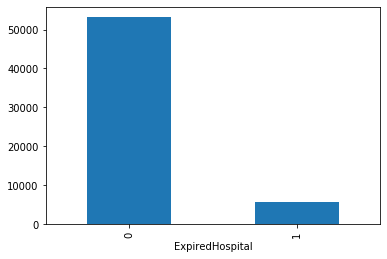

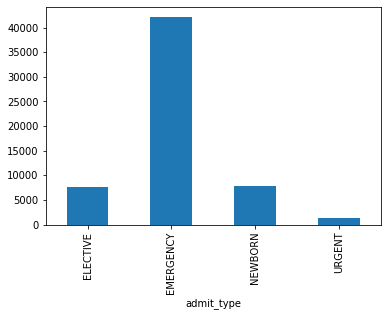

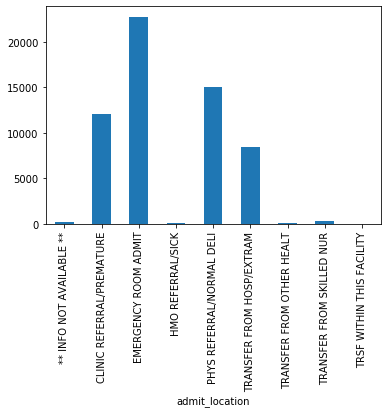

In [0]:
data_full.groupby('ExpiredHospital').size().plot.bar()
plt.show()
data_full.groupby('admit_type').size().plot.bar()
plt.show()
data_full.groupby('admit_location').size().plot.bar()
plt.show()

In [0]:
# MAP Text to Numerical Data with one-hot-encoding to convert categorical features to numerical

print(X.shape)
categorical_columns = [
                    'gender',                     
                    'admit_type',
                    'admit_location'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(58976, 18)
(58976, 30)


In [0]:
print(X.columns)
#print(X['VENTRICULOSTOMY          '])

Index(['age', 'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents',
       'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract',
       'F', 'M', 'ELECTIVE', 'EMERGENCY', 'NEWBORN', 'URGENT',
       '** INFO NOT AVAILABLE **', 'CLINIC REFERRAL/PREMATURE',
       'EMERGENCY ROOM ADMIT', 'HMO REFERRAL/SICK',
       'PHYS REFERRAL/NORMAL DELI', 'TRANSFER FROM HOSP/EXTRAM',
       'TRANSFER FROM OTHER HEALT', 'TRANSFER FROM SKILLED NUR',
       'TRSF WITHIN THIS FACILITY'],
      dtype='object')


In [0]:
print(data_full.shape)
print(X.shape)

XnotNorm = X.copy()
print('XnotNorm ', XnotNorm.shape)

#yFI = data_full.expired_icu
ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(58976, 27)
(58976, 30)
XnotNorm  (58976, 30)
ynotNorm  (58976,)


In [0]:
# Normalize X

x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
print(XNorm)

            age  ...  TRSF WITHIN THIS FACILITY
0     -0.691792  ...                  -0.009208
1      0.230296  ...                  -0.009208
2     -0.192328  ...                  -0.009208
3      0.768180  ...                  -0.009208
4      0.268716  ...                  -0.009208
...         ...  ...                        ...
58971  0.268716  ...                  -0.009208
58972  0.191876  ...                  -0.009208
58973 -1.152835  ...                  -0.009208
58974  0.614499  ...                  -0.009208
58975  1.344485  ...                  -0.009208

[58976 rows x 30 columns]


In [0]:
# SPLIT into Train & Test

X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.1, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (53078, 30)
X_test:  (5898, 30)
y_train:  (53078,)
y_test:  (5898,)


In [0]:
seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
#Mymodels.append(('LogReg', LogisticRegression()))
Mymodels.append(('RandomForest', RandomForestClassifier()))
#Mymodels.append(('SGDclassifier', SGDClassifier()))
#Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
#Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#Mymodels.append(('GaussianNB', GaussianNB()))
#Mymodels.append(('SVM', SVC()))
# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

RandomForest: 0.935190 (0.003109)


In [0]:
# Set the model according to above results

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1-np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1-np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [0]:
# LEARNING CURVES Train / Validation

title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model, title, XNorm, y, cv=cv, n_jobs=5)

In [0]:
# Model FINAL fit and evaluation on test

model.fit(X_train, y_train)
final_predictions = model.predict(X_test)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  5266
FP:  55
FN:  311
TP:  266
0.4610051993067591 0.8286604361370716


In [0]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

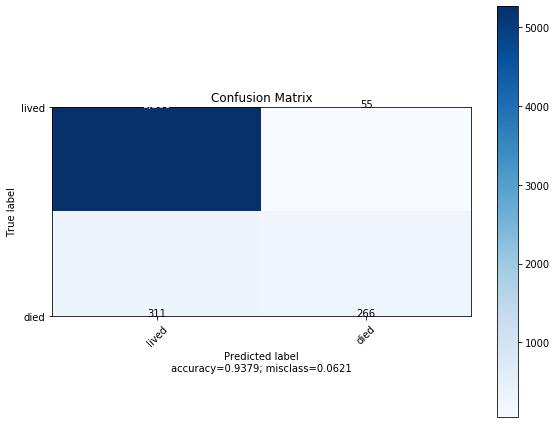

In [0]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [0]:
print ('precision ',round(precision_score(y_test, final_predictions),4))
print ('recall ',round(recall_score(y_test, final_predictions) ,4))
print ('accuracy ',round(accuracy_score(y_test, final_predictions),4))
print ('F1 score ',round(f1_score(y_test, final_predictions),4))

precision  0.8287
recall  0.461
accuracy  0.9379
F1 score  0.5924


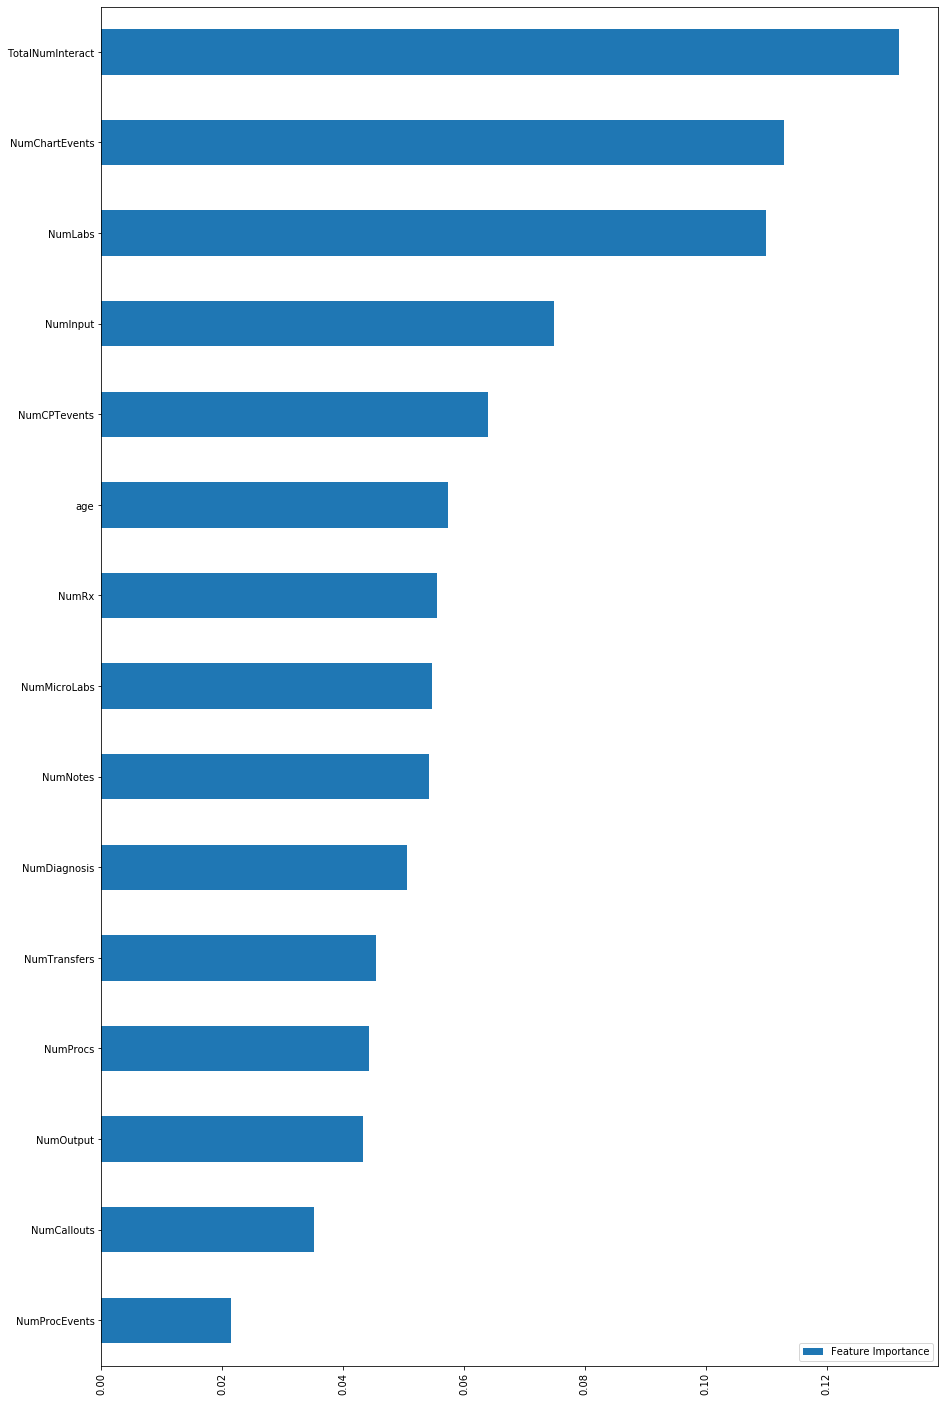

In [0]:
# FEATURE IMPORTANCE 

trainFinalFI = XNorm
yFinalFI = y
model.fit(trainFinalFI,yFinalFI)

FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model[FI_model["Feature Importance"] > 0.01].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [0]:
# List of important features for model
FI_model = pd.DataFrame({"Feature Importance":model.feature_importances_,}, index=trainFinalFI.columns)
FI_model=FI_model.sort_values('Feature Importance', ascending = False)
print(FI_model[FI_model["Feature Importance"] > 0.0025])

                           Feature Importance
TotalNumInteract                     0.131920
NumChartEvents                       0.112892
NumLabs                              0.110034
NumInput                             0.074962
NumCPTevents                         0.063982
age                                  0.057411
NumRx                                0.055515
NumMicroLabs                         0.054679
NumNotes                             0.054261
NumDiagnosis                         0.050535
NumTransfers                         0.045394
NumProcs                             0.044268
NumOutput                            0.043219
NumCallouts                          0.035192
NumProcEvents                        0.021447
EMERGENCY                            0.006386
EMERGENCY ROOM ADMIT                 0.006271
F                                    0.005893
M                                    0.005823
TRANSFER FROM HOSP/EXTRAM            0.005246
CLINIC REFERRAL/PREMATURE         

AUC: 0.725


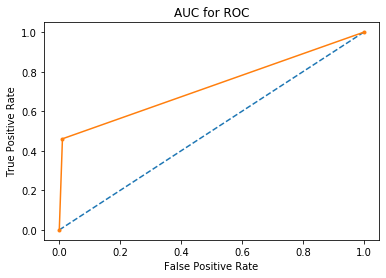

In [0]:
# AUC/ROC curves should be used when there are roughly equal numbers of observations for each class
# Precision-Recall curves should be used when there is a moderate to large class imbalance

# calculate AUC
auc = roc_auc_score(y_test, final_predictions)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, final_predictions)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('AUC for ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

f1=0.592


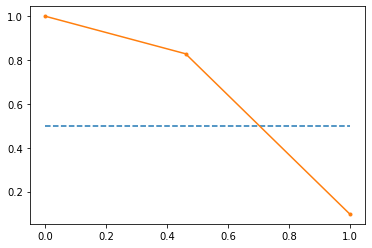

In [0]:
# Modify the raw final_predictions - prediction probs into 0 and 1

Preds = final_predictions.copy()
#print(len(Preds))
#print(Preds)
Preds[ np.where( Preds >= 0.5 ) ] = 1
Preds[ np.where( Preds < 0.5 ) ] = 0

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, Preds)
# calculate F1 score
f1 = f1_score(y_test, Preds)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

In [0]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(30,)))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

# FIT / TRAIN model

NumEpochs = 100
BatchSize = 16

model.compile(optimizer=optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(X_test, y_test))

results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

In [0]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, (len(history_dict['binary_accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()